# K-Nearest Neighbors Classification

This is a user-friendly Jupyter Notebook version of KNN classifier. It allows users to:

- Upload a dataset
- Perform grid search for the best k with LOOCV
- View classification results (accuracy, sensitivity, specificity)
- Visualize the confusion matrix for the entire dataset
- Visualize score report for each sample    


## Import Libraries

In [1]:
import knn_utils as knn
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
import io
import pandas as pd

## Interactive UI
* Click the "Upload File" button and choose the input .csv file.
* Use the buttons below to run KNN with different grid search strategies:
    * Grid Search (default)
Selects the best number of neighbors (K) using Leave-One-Out Cross-Validation based on mean accuracy.
Recommended for general classification tasks.
    * Grid Search (ROC)
Selects the best K based on mean AUC (Area Under the ROC Curve) across LOOCV folds.
Recommended when your goal is to optimize ROC performance, especially with imbalanced or multiclass datasets.


After the best K is selected, a final KNN model will be trained and evaluated on the full dataset.

In [2]:
# File upload and run button
uploader = widgets.FileUpload(accept='.csv', multiple=False, description="Upload File")
run_button = widgets.Button(description='Run KNN', button_style='success')
output = widgets.Output()

# Run button
accuracy_button = widgets.Button(description='Grid Search (default)', button_style='success')
roc_button = widgets.Button(description='Grid Search (ROC)', button_style='info')

def get_file_content():
    global X, y, file_name
    if not uploader.value:
        print("⚠️ No file uploaded. Please choose the input file and re-run the code above.") 
        return False
    else:
        value = uploader.value
        # Handle multiple possible structures: dict, tuple, list
        if isinstance(value, dict):
            uploaded_file = list(value.values())[0]
        elif isinstance(value, (list, tuple)):
            uploaded_file = value[0]
        else:
            print("Unsupported uploader value format.")
            
        content = uploaded_file['content']                # Binary content of the file
        file_name = uploaded_file['name']        
        
        data = pd.read_csv(io.BytesIO(content))     # Read into a DataFrame from memory buffer
        X = data.drop(columns=['NAME', 'CLASS'])    # Use all columns except 'NAME' and 'CLASS' as features        
        y = data['CLASS']                           # Use 'CLASS' as the target label
        return True

def on_accuracy_clicked(b):  
    with output:
        output.clear_output() 
        if get_file_content():
            knn.run_grid_accuracy(X, y, metric="euclidean", weights="one", file = file_name)
        
def on_roc_clicked(b):
    with output:
        output.clear_output() 
        if get_file_content():
            knn.run_grid_roc(X, y, metric="euclidean", weights="one", file = file_name) 

#with output:  # All printed output will appear inside the 'output' widget
#    output.clear_output()  # Clear previous output

accuracy_button.on_click(on_accuracy_clicked)
roc_button.on_click(on_roc_clicked)

# === Final Output Display ===
display(HTML("<b>Upload CSV File</b>")) 

display(
    uploader,
    widgets.HBox([accuracy_button, roc_button]),
    output
)

FileUpload(value=(), accept='.csv', description='Upload File')

Output()

####  Run the cell below to plot confusion matrix heatmaps for the entire dataset.

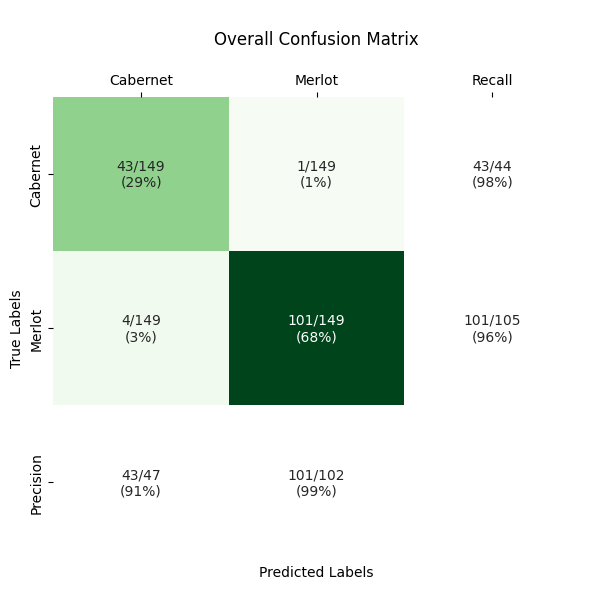

In [3]:
knn.plot_confusion_matrix_heatmap_with_metrics("\nOverall Confusion Matrix\n")  

#### Run the code below to plot scores for each item in the entire dataset

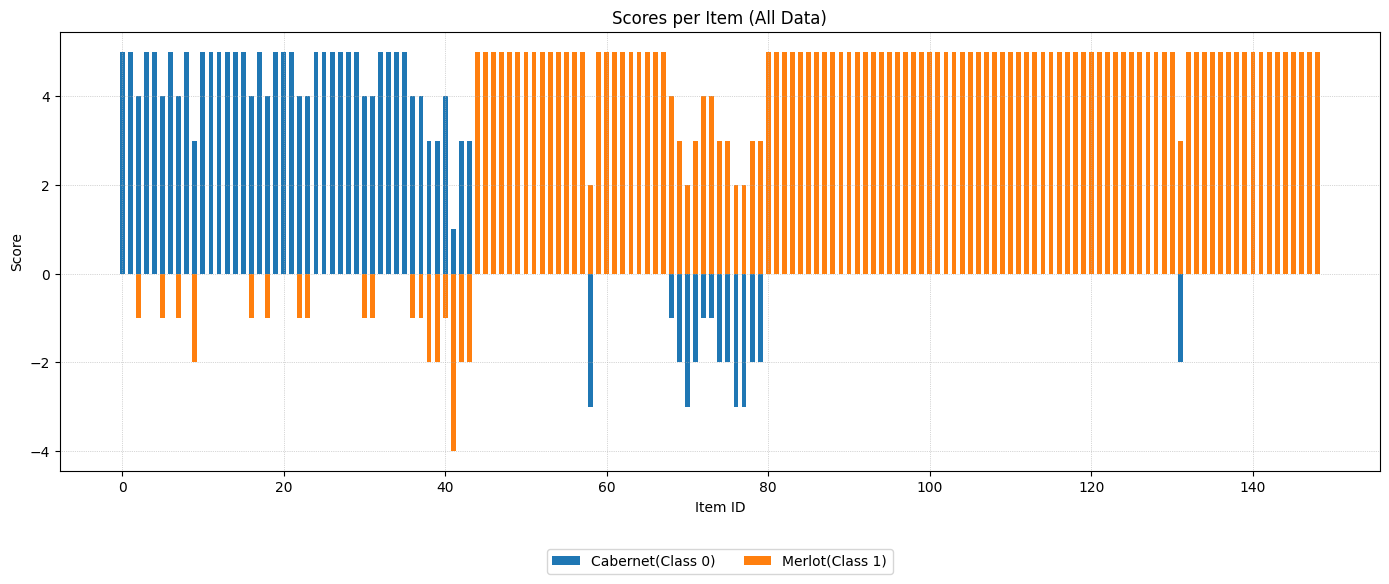

In [4]:
knn.plot_items_scores("All Data")